In [ ]:
# @title Instalar librerias relacionadas al toolbox

%pip install flaml
%pip install rdt
%pip install h2o
%pip install numba #==0.56.4
%pip install lazypredict

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.2/314.2 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.9/265.9 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 82.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 720.5/720.5 kB 59.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# @title Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lazypredict
# import autoviz
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
import rdt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path_file = '/content/drive/MyDrive/TALENTO TECH/PROYECTO FINAL/Datos/data_url.xlsx'

In [ ]:
df = pd.read_excel(path_file)

In [ ]:
df.shape

(11160, 90)

In [ ]:
%pip install rdt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.8/73.8 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 25.5 MB/s eta 0:00:00


In [ ]:
%pip install missingno

<Axes: >

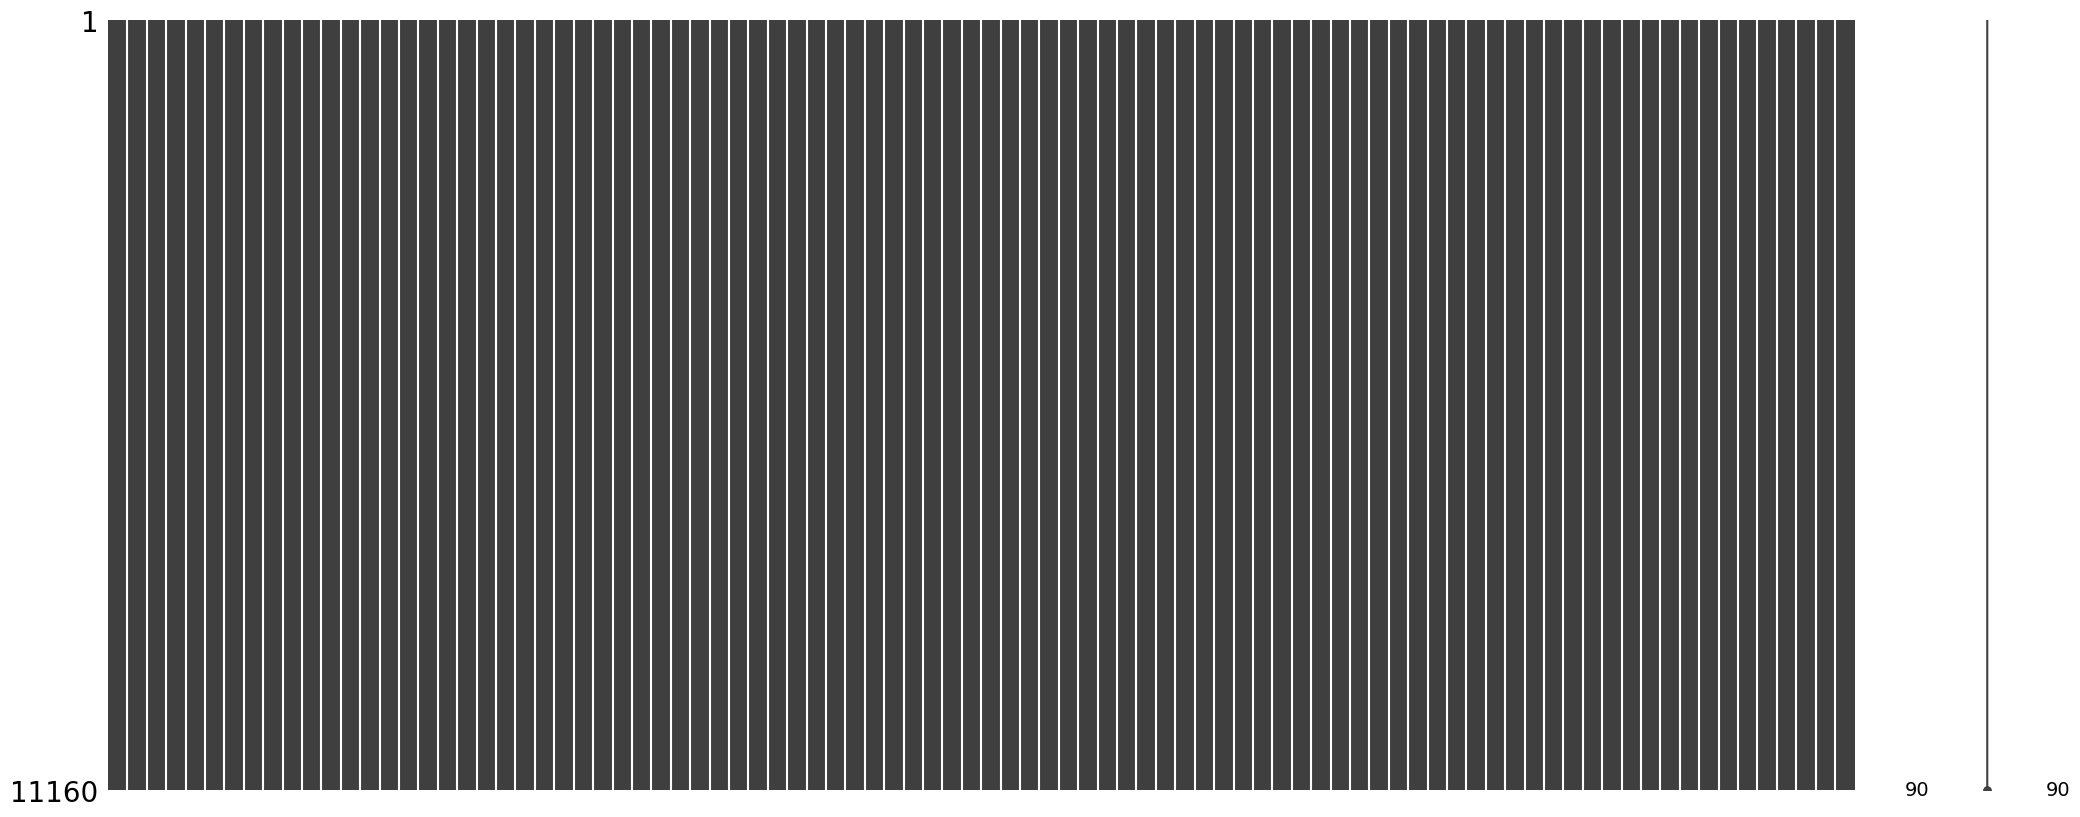

In [ ]:
import missingno as msno
msno.matrix(df)

In [ ]:
df_ = df.drop(columns=['url'])

In [ ]:
df_.columns

Index(['length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at',
       'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore', 'nb_tilde',
       'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 'nb_hyp

In [ ]:
import pandas as pd
from rdt import HyperTransformer
from sklearn.model_selection import train_test_split


# 3️⃣ Eliminar filas con valores nulos
df_ = df_.dropna()
# 4️⃣ Separar variable objetivo
target_column = "status"
X = df_.drop(columns=[target_column])
y = df_[target_column]

# 5️⃣ Crear el transformador RDT 🚀
ht = HyperTransformer()

# 6️⃣ Detectar configuración automáticamente ✅
ht.detect_initial_config(X)

# 7️⃣ Ajustar y transformar los datos 🔄
ht.fit(X)
X_transformed = ht.transform(X)

# 8️⃣ Convertir a DataFrame para visualizar 🔍
X_transformed = pd.DataFrame(X_transformed, columns=X.columns)

# 9️⃣ Mostrar comparación antes y después de la transformación
print("🔹 Datos originales:")
print(X.head())

print("\n🔹 Datos transformados:")
print(X_transformed.head())
print(X_transformed.shape)



🔹 Datos originales:
   length_url  length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  \
0          39               16   0        2           0      0      0       0   
1          99               15   0        2           2      0      0       0   
2          88               24   0        7           1      1      0       0   
3          34               11   0        1           0      0      0       0   
4          39               16   0        2           0      0      0       0   

   nb_or  nb_eq  ...  domain_in_title  domain_with_copyright  \
0      0      0  ...                1                      1   
1      0      0  ...                1                      1   
2      0      0  ...                0                      0   
3      0      0  ...                1                      0   
4      0      0  ...                0                      0   

   whois_registered_domain  domain_registration_length  domain_age  \
0                        0            

In [ ]:
# 🔟 Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

In [ ]:
# clasificar con los datos transformados
from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import accuracy_score

# 1️⃣1️⃣ Aplicar LazyPredict 🚀
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=accuracy_score)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# 1️⃣2️⃣ Mostrar resultados ordenados por precisión
print("🔹 Comparación de Modelos:")
models.sort_values(by="Accuracy", ascending=False)


  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 4361, number of negative: 4567
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004274 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5076
[LightGBM] [Info] Number of data points in the train set: 8928, number of used features: 72
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.488463 -> initscore=-0.046155
[LightGBM] [Info] Start training from score -0.046155
🔹 Comparación de Modelos:


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,accuracy_score,Time Taken
Model,,,,,,
LGBMClassifier,0.97,0.97,None,0.97,0.97,0.65
RandomForestClassifier,0.97,0.97,None,0.97,0.97,1.71
ExtraTreesClassifier,0.97,0.97,None,0.97,0.97,1.04
BaggingClassifier,0.96,0.96,None,0.96,0.96,1.39
SVC,0.96,0.96,None,0.96,0.96,2.81
KNeighborsClassifier,0.94,0.94,None,0.94,0.94,0.36
AdaBoostClassifier,0.94,0.94,None,0.94,0.94,2.20
LinearSVC,0.94,0.94,None,0.94,0.94,0.21
LogisticRegression,0.94,0.94,None,0.94,0.94,0.71


In [ ]:
# prompt: necesito el modelo de LGBMClassifier para la base de datos ya partida: X_train, X_test, y_train, y_test)

import lightgbm as lgb

# Crear el modelo LGBMClassifier
lgbm = lgb.LGBMClassifier(random_state=42)

# Entrenar el modelo
lgbm.fit(X_train, y_train)

# Realizar predicciones
y_pred = lgbm.predict(X_test)

# Evaluar el modelo
print("Precisión del modelo LGBM:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))


[LightGBM] [Info] Number of positive: 4361, number of negative: 4567
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006762 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5054
[LightGBM] [Info] Number of data points in the train set: 8928, number of used features: 72
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.488463 -> initscore=-0.046155
[LightGBM] [Info] Start training from score -0.046155
Precisión del modelo LGBM: 0.9717741935483871

Reporte de clasificación:
               precision    recall  f1-score   support

  legitimate       0.97      0.98      0.97      1134
    phishing       0.98      0.96      0.97      1098

    accuracy                           0.97      2232
   macro avg       0.97      0.97      0.97      2232
weighted avg       0.97      0.97      0.97      2232


Matriz de confusión:
 [[1111   23]
 [  40 1

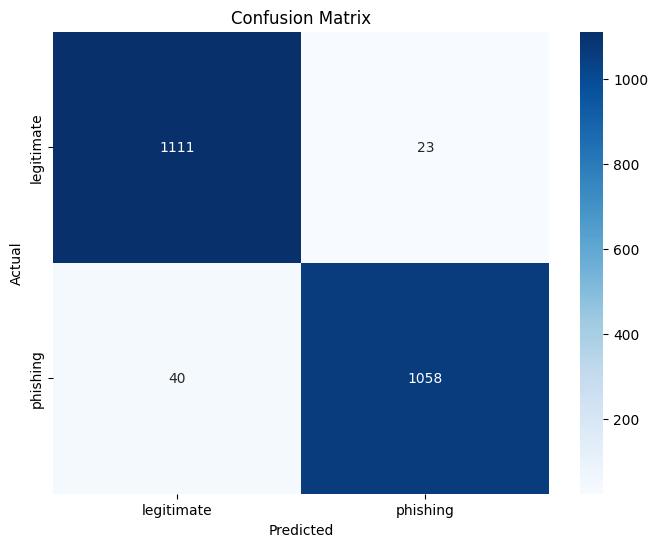

In [ ]:
# prompt: quiero la matriz de confusión organizada

# Organizar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
import seaborn as sns
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
